In [4]:
# Prj heading

In [5]:
%matplotlib inline

This forces all the graphs to be inline

In [6]:
import csv
import datetime
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter

Definition of private class used to store data

In [7]:
class Report:
    def __init__(self, offense, reportdate, district, zone):
        self.offense = offense
        self.reportdate = reportdate
        self.district = district
        self.zone = zone
    def __str__(self):
        return "Offense:" + self.offense + " ReportDate: " + str(self.reportdate) + " District: " + self.district + " Zone: " + self.zone

In [8]:
def loadcsv(datafile, crimeidx, districtidx, datetimeformat=None, zoneidx=None,reportdatetimeidx= None, alternatereportdatetimeidx=None, reportdateidx=None, reporttimeidx=None, reportdateformat=None, reporttimeformat=None,):
    reportlist = []
    with open(datafile, 'r') as csvfile:
        next(csvfile) # has header
        offenselist = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in offenselist:
            crime = row[crimeidx]
            if reportdatetimeidx is not None:
                if row[reportdatetimeidx] == "":
                    rd = row[alternatereportdatetimeidx]
                else:
                    rd = row[reportdatetimeidx]
            if reportdateidx is not None and reporttimeidx is not None:
                rd = row[reportdateidx] + " " + row[reporttimeidx]
            reportdate = datetime.datetime.strptime(rd, datetimeformat)
            district = row[districtidx]
            if zoneidx is not None:
                zone = row[zoneidx]
            else:
                zone = district
            reportlist.append(Report(crime,reportdate, district, zone))
    return reportlist


This method is used to load the data from the CSV file. The code is parameterized to handle the different schema of Seattle and San Francisco

In [9]:
    # 6 Summary Offense Code
    # 8 Date Reported
    # 9 Actual Date (sometimes None)
    # 11 District/Sector
    # 12 Zone/Beat
    reportlist_seattle = loadcsv(datafile='/home/penzk001/ds3/assignment6/seattle_incidents_summer_2014.csv', crimeidx=6, reportdatetimeidx=9, alternatereportdatetimeidx=8, districtidx=11, zoneidx=12, datetimeformat="%m/%d/%Y %H:%M:%S %p")
    # 2 Category
    # 4 Date
    # 5 Time
    # 8 District
    reportlist_sanfrancisco = loadcsv(datafile='/home/penzk001/ds3/assignment6/sanfrancisco_incidents_summer_2014.csv', crimeidx=1,reportdateidx=4, reporttimeidx=5, districtidx=6, datetimeformat = "%m/%d/%Y %H:%M")


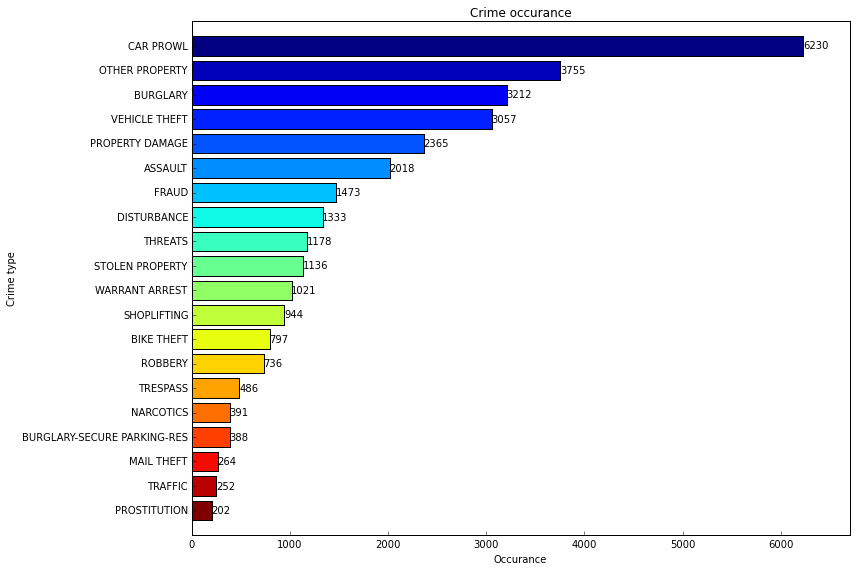

In [10]:
def offensefunction(reportlist):
    crimedict = {}
    for row in reportlist:
        crime = row.offense
        if crime in crimedict:
            crimedict[crime] = crimedict[crime]  + 1
        else:
            crimedict[crime] = 1
    sorteddict = sorted(crimedict.items(), key=itemgetter(1),  reverse=True)
    return sorteddict

def gettopitems(dictionary, noofitems, sorted = True):
    list1 = []
    list2 = []
    if sorted == True:
        sorteddict = dictionary
    else:
        sorteddict = sorted(dictionary.items(), key=itemgetter(1),  reverse=True)
    for x in range(0, noofitems):
        list1.append(sorteddict[x][0])
        list2.append(sorteddict[x][1])
        #print sorteddict[x][0] + " " + str(sorteddict[x][1])
    return list1,list2


def showtop(dictionary, noofitems, sorted = True):
    if sorted == True:
        sorteddict = dictionary
    else:
        sorteddict = sorted(dictionary.items(), key=itemgetter(1),  reverse=True)
    for x in range(0, noofitems):
        print (sorteddict[x][0] + " " + str(sorteddict[x][1]))
        
def plotgraph(crimedesc, crimeoccur):
     l = len(crimedesc)
#    for k in range (0, l):
#        print crimedict[k] + " : " + str(crimeoccur[k])
     N = range(len(crimedesc) )
#     N = np.arange(len(crimedesc)) 
     jet = plt.get_cmap('jet')
#     plt.bar(range(N), crimeoccur, align='center', color=jet(np.linspace(0, 1.0, N)))
#     plt.xticks(range(N), crimedesc, rotation=25)
#     plt.rcParams.update({'font.size': 14})
     fig = plt.figure(figsize=(12,8))
     ax = fig.add_subplot(111)


     p1 = plt.barh(N, crimeoccur, align='center', color=jet(np.linspace(0, 1.0, len(crimedesc))))
     plt.yticks(N, crimedesc)
    #plt.yticks(N, crimedesc, rotation=25)
     plt.ylabel('Crime type')
     plt.xlabel('Occurance')
     plt.title('Crime occurance')
     autolabelh(p1, ax)
     ax.xaxis.set_ticks_position('bottom')
     ax.yaxis.set_ticks_position('left')
     plt.axis([0, 6700, l   , -1])
#     plt.axis([0, 10000, l  , 0])
     plt.tight_layout()
     #plt.show()
        
def autolabelh(rects, ax):
    # attach some text labels
    for rect in rects:
        width = rect.get_width()
        height = rect.get_height()
        ax.text(4 +rect.get_x() +  width  , rect.get_y() + (height/2) *.98 ,
                '%d' % int(width), fontsize=10,
                ha='left', va='center')

        
def chart1(reportlist):
    crimedict = offensefunction(reportlist)
    #showtop(crimedict, 20)
    crimedesc, crimeoccur = gettopitems(crimedict, 20)
    plotgraph(crimedesc, crimeoccur)
    #print (crimedesc)
    #print (crimeoccur)

chart1(reportlist_seattle)


Chart2


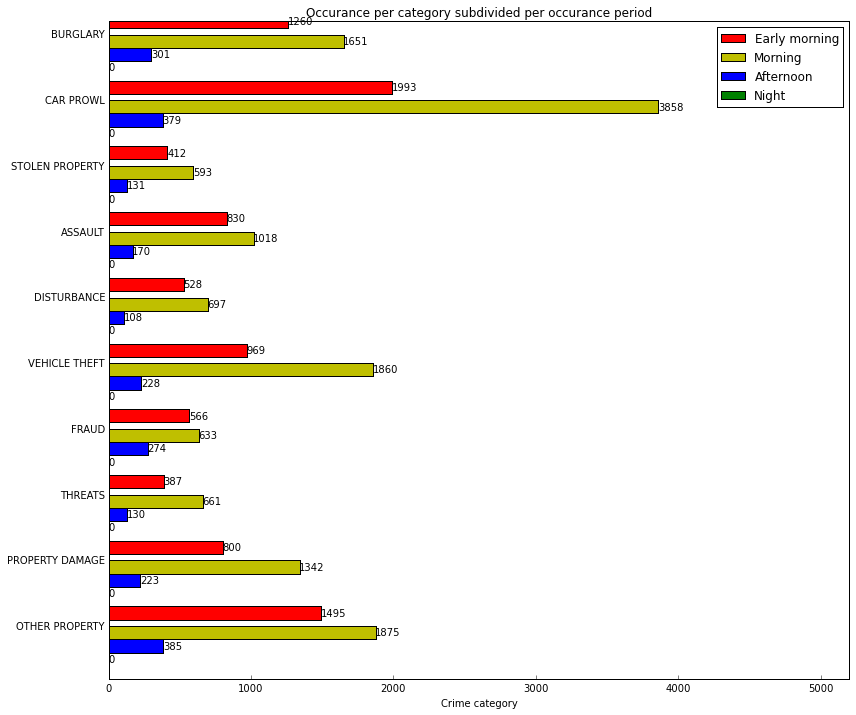

In [11]:
EARLY_MORNING="Early morning"
MORNING="Morning"
AFTERNOON="Afternoon"
NIGHT="Night"

timeconvert =  {
                0 : EARLY_MORNING,
                1 : EARLY_MORNING,
                2 : EARLY_MORNING,
                3 : EARLY_MORNING,
                4 : EARLY_MORNING,
                5 : EARLY_MORNING,
                6 : MORNING,
                7 : MORNING,
                8 : MORNING,
                9 : MORNING,
               10 : MORNING,
               11 : MORNING,
               12 : AFTERNOON,
               13 : AFTERNOON,
               14 : AFTERNOON,
               15 : AFTERNOON,
               16 : AFTERNOON,
               17 : AFTERNOON,
               18 : NIGHT,
               19 : NIGHT,
               20 : NIGHT,
               21 : NIGHT,
               22 : NIGHT,
               23 : NIGHT,
               24 : NIGHT,
}

def offensetime(reportlist, crim):
    dict = {}
    for row in reportlist:
        if row.offense == crim:
            key = timeconvert[row.reportdate.time().hour]
            if key in dict:
                dict[key] = dict[key] + 1
            else:
                dict[key] = 1
    return dict

def chart2(reportlist):
    print ("Chart2")
    dict = {}
    crimedict = offensefunction(reportlist)
    #showtop(crimedict, 20)
    crimedesc, crimeoccur = gettopitems(crimedict, 10)
    for crim in crimedesc:
        offensetiming = offensetime(reportlist, crim)
        dict[crim] = offensetiming
    title, earlymorning, morning, afternoon, night = preparechart2(dict)
    plotgraphchart2(title, earlymorning, morning, afternoon, night)

def preparechart2(dict):
    earlymorning = []
    morning = []
    afternoon = []
    night = []
    title = []
    for entry in dict:
        key = entry
        title.append(key) # append heading
        lists = dict[entry]
        if EARLY_MORNING in lists:
            earlymorning.append(lists[EARLY_MORNING])
        else:
            earlymorning.append(0)
        if MORNING in lists:
            morning.append(lists[MORNING])
        else:
            morning.append(0)
        if AFTERNOON in lists:
            afternoon.append(lists[AFTERNOON])
        else:
            afternoon.append(0)
        if NIGHT in lists:
            night.append(lists[NIGHT])
        else:
            night.append(0)
    return title, earlymorning, morning, afternoon, night

def plotgraphchart2(title, earlymorning, morning, afternoon, night):
    # Final hbar !!
    N = len(title)
    ind = np.arange(N)    # the x locations for the groups
    width = 0.2     # the width of the bars: can also be len(x) sequence

    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    p1 = ax.barh(ind, earlymorning, width, left = 0, align='center', label='a', color='r')
    p2 = ax.barh(ind + width, morning, width, color='y')
    p3 = ax.barh(ind + (width * 2), afternoon, width,  color='b')
    p4 = ax.barh(ind + (width * 3), night, width, color='g')
    
    ax.set_xlabel('Occurance')
    ax.set_xlabel('Crime category')
    ax.set_title('Occurance per category subdivided per occurance period')
    ax.set_yticks(ind + (width * 1))
    #ax.set_yticks(ind)
    ax.set_yticklabels(title)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.legend((p1[0], p2[0], p3[0], p4[0]), (EARLY_MORNING, MORNING, AFTERNOON,NIGHT))
    autolabelh(p1, ax)
    autolabelh(p2, ax)
    autolabelh(p3, ax)
    autolabelh(p4, ax)
    plt.axis([0, 5200, N , 0])
    plt.tight_layout()
      #plt.show()

def autolabel(rects, ax):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height + 4,
                '%d' % int(height), fontsize=10,
                ha='center', va='bottom')

def plotgraphchart2u(title, earlymorning, morning, afternoon, night):
    N = len(title)
    ind = np.arange(N)    # the x locations for the groups
    width = 0.18       # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots()
    p1 = ax.bar(ind, earlymorning, width, align='center', color='r')
    p2 = ax.bar(ind + width, morning, width, color='y')
    p3 = ax.bar(ind + (width * 2), afternoon, width, color='b')
    p4 = ax.bar(ind + (width * 3), night, width, color='g')
    ax.set_ylabel('Occurance')
    ax.set_title('Scores by group and gender')
    ax.set_xticks(ind + (width * 2.6))
    ax.set_xticklabels((EARLY_MORNING, MORNING, AFTERNOON,NIGHT))
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(labelsize=13)
    ax.yaxis.set_ticks_position('left')
    ax.set_xticklabels(title, rotation=75)
    ax.legend((p1[0], p2[0], p3[0], p4[0]), (EARLY_MORNING, MORNING, AFTERNOON,NIGHT))
    autolabel(p1, ax)
    autolabel(p2, ax)
    autolabel(p3, ax)
    autolabel(p4, ax)
    plt.tight_layout()
    #plt.show()

##     N = len(title)
##     ind = np.arange(N)    # the x locations for the groups
##     width = 0.35       # the width of the bars: can also be len(x) sequence
##
##     p1 = plt.bar(ind, earlymorning, width, color='r')
##     p2 = plt.bar(ind, morning, width, color='y', bottom=earlymorning)
##     p3 = plt.bar(ind, afternoon, width, color='b', bottom=earlymorning)
##     p4 = plt.bar(ind, night, width, color='g', bottom=earlymorning)
##
##     plt.ylabel('Scores')
##     plt.title('Scores by group and gender')
##     plt.xticks(ind + width/2., title)
###     plt.yticks(np.arange(0, 81, 10))
##     plt.legend((p1[0], p2[0], p3[0], p4[0]), (EARLY_MORNING, MORNING, AFTERNOON,NIGHT))
##     plt.show()


chart2(reportlist_seattle)


Chart2
[1260, 1993, 412, 830, 528, 969, 566, 387, 800, 1495]
[1651, 3858, 593, 1018, 697, 1860, 633, 661, 1342, 1875]
[301, 379, 131, 170, 108, 228, 274, 130, 223, 385]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


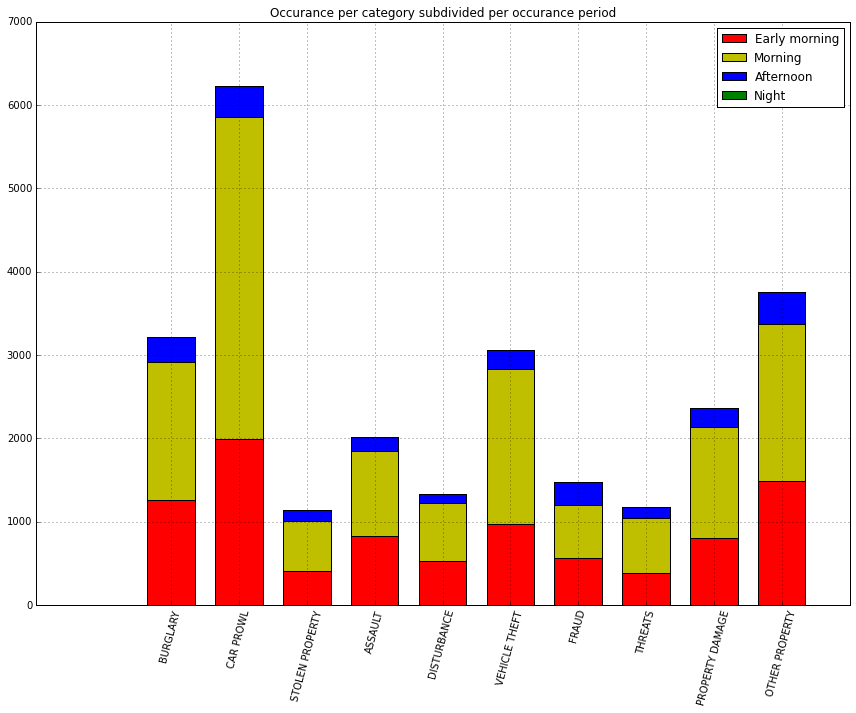

In [12]:
def plotgraphchart2b(title, earlymorning, morning, afternoon, night):
    # Final hbar !!
    N = len(title)
    ind = np.arange(N)    # the x locations for the groups
    width = 0.7     # the width of the bars: can also be len(x) sequence

    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    print (earlymorning)
    print (morning)
    print (afternoon)
    print (night)
    # calc references
    morning_ref = earlymorning
    afternoon_ref = list(map(lambda x, y: x + y, morning_ref, morning))
    aftenight_ref = list(map(lambda x, y: x + y, afternoon_ref, afternoon))
    
    p1 = ax.bar(ind, earlymorning, width, align='center', color='r')
    p2 = ax.bar(ind , morning, width, bottom=morning_ref,  align='center', color='y')
    p3 = ax.bar(ind , afternoon,  width, bottom=afternoon_ref , align='center', color='b')
    p4 = ax.bar(ind , night,  width, bottom=aftenight_ref, align='center', color='g')
    
    #ax.set_xlabel('Occurance')
    #ax.set_xlabel('Crime category')
    ax.set_title('Occurance per category subdivided per occurance period')
    # ax.set_yticks(ind + (width * 1))
    ax.set_xticks(ind)
    ax.set_xticklabels(title, rotation=75)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.legend((p1[0], p2[0], p3[0], p4[0]), (EARLY_MORNING, MORNING, AFTERNOON,NIGHT))
    ax.grid(True)
#    autolabelh(p1, ax)
#    autolabelh(p2, ax)
#    autolabelh(p3, ax)
#    autolabelh(p4, ax)
    # plt.axis([0, 5200, N , 0])
    plt.tight_layout()
    
def chart2(reportlist):
    print ("Chart2")
    dict = {}
    crimedict = offensefunction(reportlist)
    #showtop(crimedict, 20)
    crimedesc, crimeoccur = gettopitems(crimedict, 10)
    for crim in crimedesc:
        offensetiming = offensetime(reportlist, crim)
        dict[crim] = offensetiming
    title, earlymorning, morning, afternoon, night = preparechart2(dict)
    plotgraphchart2b(title, earlymorning, morning, afternoon, night)    
    
chart2(reportlist_seattle)

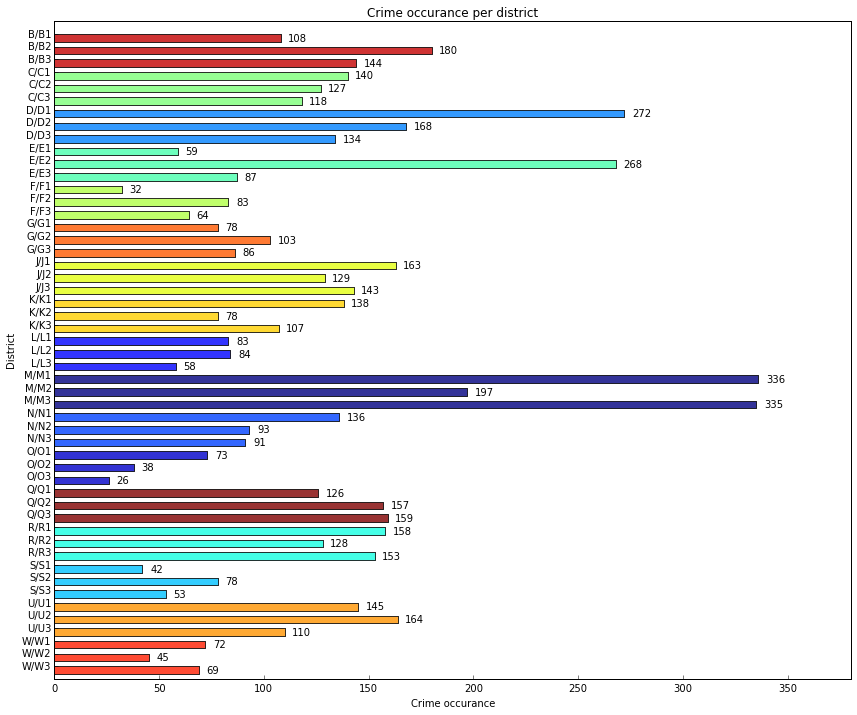

In [13]:
def preparechart3(dict, offense):
    districtlist = []
    zonelist = []
    occurancelist = []
    for entry in dict:
        if entry.district == "" or entry.district == "99":
              continue
#          print entry.district + " " + entry.zone
        key = entry.offense
        if key == offense:
            district = entry.district
            zone = district + "/" + entry.zone
            if zone in zonelist:
                idx = zonelist.index(zone)
                occurancelist[idx] = occurancelist[idx] + 1
            else:
                districtlist.append(district)
                zonelist.append(zone)
                occurancelist.append(1)
    # sort
    zonelist_s, occurancelist_s, districtlist_s = zip(*sorted(zip(zonelist,occurancelist,districtlist)))

    uniquedistricts = list(set(districtlist_s))
    uniquedistrictslen = len(uniquedistricts)

    jet = plt.get_cmap('jet')
    colors = jet(np.linspace(0, 1.0, uniquedistrictslen))
    colorlist = []
    for k in range(0, len(districtlist_s)):
        d = districtlist_s[k]
        idx = uniquedistricts.index(d)
        colorlist.append(colors[idx])

    return districtlist_s, zonelist_s, occurancelist_s,colorlist

def plotgraphchart3(title, districtlist, zonelist, occurancelist, colorlist):
     l = len(zonelist)
     N = range(l)
     jet = plt.get_cmap('jet')
     fig = plt.figure(figsize=(12,10))
     ax = fig.add_subplot(111)

     p1 = plt.barh(N, occurancelist, align='edge', color=colorlist, height=0.6, alpha=.8)
#     p1 = plt.bar(N, occurancelist, align='center', color=colorlist, width=0.6, alpha=.8)
#     plt.yticks(N, districtlist)
     plt.yticks(N, zonelist)
#     plt.xticks(N, zonelist, rotation=90)
     plt.xlabel('Crime occurance')
#     plt.ylabel('Crime occurance')
     plt.ylabel('District')
#     plt.xlabel('District')
     plt.title('Crime occurance per district')
     ax.xaxis.set_ticks_position('bottom')
     ax.yaxis.set_ticks_position('left')
#    plt.axis([min(x_arr), max(x_arr), max(y_arr), 0])
     plt.axis([0, 380 ,l, -1])
#     plt.axis([0, 2700 ,l, 0])
     autolabelh(p1, ax)
#     autolabel(p1, ax)
#     ax.grid(True)
     plt.tight_layout()
     plt.show()

def chart3(reportlist):
    dict = {}
    crimedict = offensefunction(reportlist)
    crimedesc, crimeoccur = gettopitems(crimedict, 1)
    for crim in crimedesc:
        districtlist, zonelist, occurancelist, colorlist = preparechart3(reportlist, crim)
        plotgraphchart3(crim, districtlist, zonelist, occurancelist, colorlist)

chart3(reportlist_seattle)

## San Francisco

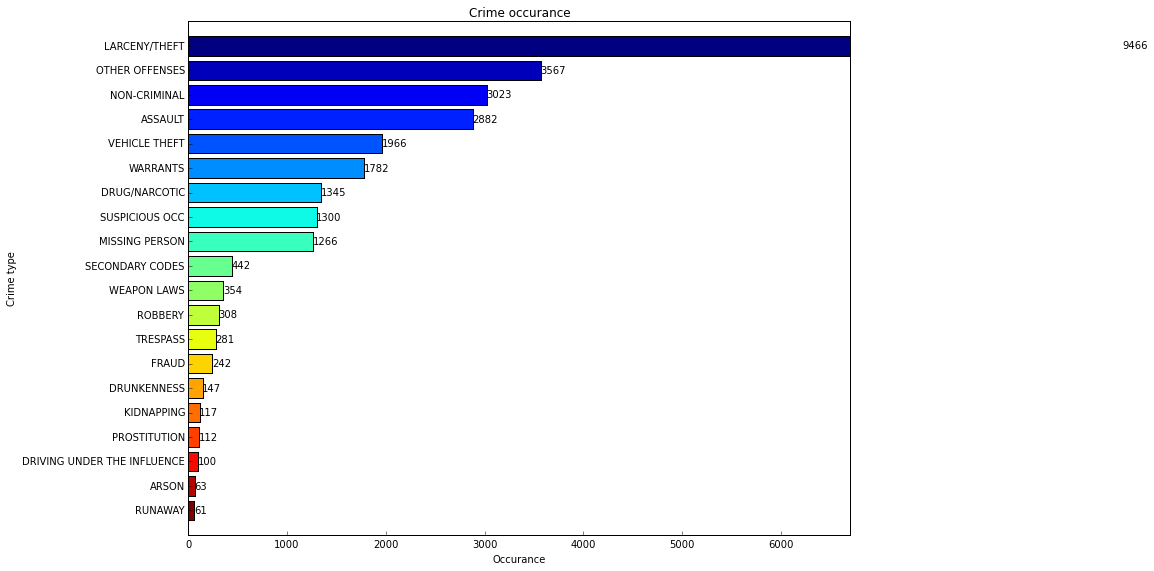

In [14]:
chart1(reportlist_sanfrancisco)

From the figure above the most common crime in San Francisco is larceny.

Chart2
[946, 208, 569, 152, 215, 360, 579, 102, 71, 173]
[1549, 359, 541, 249, 299, 740, 697, 405, 86, 272]
[3136, 672, 863, 565, 531, 1145, 1262, 473, 150, 483]
[3835, 543, 909, 379, 921, 778, 1029, 286, 135, 372]


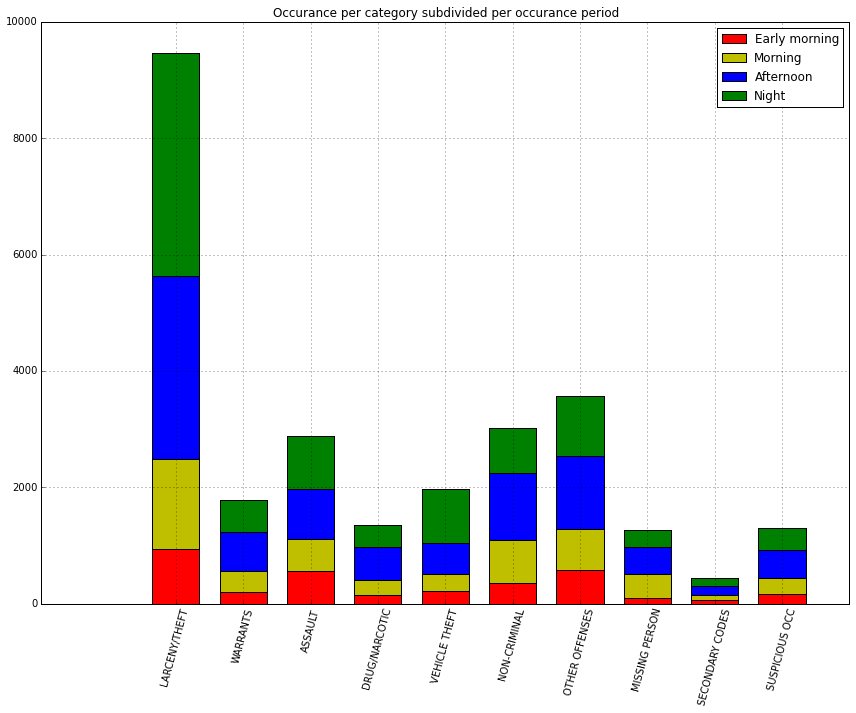

In [15]:
chart2(reportlist_sanfrancisco)

the above figure shows the co-relation between the time of the day and the crime being committed. 

##  Comparing Seattle and San Francisco

From the above analysis a trend that emerges it that during the night San Francicso less safer than Seattle.

In [16]:
OFFENSENAMING =  {"BIKE THEFT" : "BURGLARY",
                  "CAR PROWL"  : "BURGLARY",
                  "ESCAPE"     : "RUNAWAY",
                  "WARRANT ARREST" : "WARRANTS",
                  "VEHICLE THEFT" : "MAIL THEFT",
                  "WEAPON LAW" :  "WEAPON",
                  "DRUG/NARCOTIC" : "NARCOTICS",
                  "PORNOGRAPHY/OBSCENE MAT" : "PORNOGRAPHY",
                  "EMBEZZLEMENT" : "EMBEZZLE",
                  "WEAPON LAWS" : "WEAPON",
                  "LIQUOR VIOLATION" : "LIQUOR",
                  "LIQUOR LAWS" : "LIQUOR",
                  "FORGERY"   : "FORGERY/COUNTERFEIT",
                  "COUNTERFEIT" : "FORGERY/COUNTERFEIT",
                  "FORGERY/COUNTERFEITING" : "FORGERY/COUNTERFEIT",
                  "LOITERING" : "PROSTITUTION",
                  "PURSE SNATCH" : "ROBBERY",
                  "SHOPLIFTING" : "ROBBERY",
                  "PICKPOCKET" : "ROBBERY",
                  "DRIVING UNDER THE INFLUENCE" : "DUI",
                  "BURGLARY-SECURE PARKING-RES" : "BURGLARY",
                  "VIOLATION OF COURT ORDER" : "WARRANTS",
                  "RECKLESS BURNING" : "ARSON",
                  "THEFT OF SERVICES" : "ROBBERY",
                  "LARCENY/THEFT" : "BURGLARY",
                  "INJURY" : "DISORDERLY CONDUCT",
                  "DISTURBANCE" :  "DISORDERLY CONDUCT",
                  "ELUDING" : "DISORDERLY CONDUCT",
                  "OTHER PROPERTY": "BURGLARY",
                  "FAMILY OFFENSES" :  "DISORDERLY CONDUCT",
                  "FALSE REPORT"  :  "OTHER OFFENSES",
                  "OBSTRUCT"  :  "OTHER OFFENSES",
                  "TRAFFIC"  :  "OTHER OFFENSES",
                  "ANIMAL COMPLAINT" : "OTHER OFFENSES",
                  "LOST PROPERTY" : "NON-CRIMINAL",

}

def allignnaming(reportlist):
    for row in reportlist:
        if row.offense in OFFENSENAMING:
            row.offense = OFFENSENAMING[row.offense]


In [1]:
def getOffense(alist, offense):
    count = 0
    for row in alist:
        if offense == row.offense:
            count +=1
    return count

def chart4(reportlist_seattle, reportlist_sanfrancisco):
    allignnaming(reportlist_sanfrancisco)
    allignnaming(reportlist_seattle)

    #offenses = list(set(getOffenselist(reportlist_sanfrancisco) + getOffenselist(reportlist_seattle)))
    offenses = list(set([report.offense for report in reportlist_seattle] + [report.offense for report in reportlist_sanfrancisco]))
    #off_se.append(getOffense(reportlist_seattle, offense))

    off_sf = []
    off_se = []
    off_total = []
    for offense in offenses:
        tmp1 = (len(list([report.offense for report in reportlist_seattle if report.offense == offense])))
        #off_se.append(getOffense(reportlist_seattle, offense))
        off_se.append(tmp1)
        tmp2 = (len(list([report.offense for report in reportlist_sanfrancisco if report.offense == offense])))
        #off_sf.append(getOffense(reportlist_sanfrancisco, offense))
        off_sf.append(tmp2)
        off_total.append(tmp1 + tmp2)
'''
>>> A = ['A','C','Q']
>>> B = [3,7,4]
>>> C = [90,12,600]
>>> [sum(x) for x in zip(B ,C) ]
[93, 19, 604]
>>> D = [sum(x) for x in zip(B ,C) ]
>>> del A[2]
>>> del B[2]
>>> del C[2]
'''

    N = len(offenses)
    ind = np.arange(N)    # the x locations for the groups
    width = 0.4       # the width of the bars: can also be len(x) sequence

#    fig = plt.figure(figsize=(14,8))
    fig = plt.figure(figsize=(12,12))
    #    plt.axis([min(x_arr), max(x_arr), max(y_arr), 0])
    ax = fig.add_subplot(111)

    # fig, ax = plt.subplots()
    p1 = ax.barh(ind, off_sf, width, color='r')
    p2 = ax.barh(ind + width, off_se, width, color='b')
#    p1 = ax.bar(ind, off_sf, width, color='r')
#    p2 = ax.bar(ind + width, off_se, width, color='b')

    ax.set_ylabel('Crime occurance')
    ax.set_title('Crime reports per state')
    ax.set_yticks(ind + (width ))
    ax.set_yticklabels(offenses)
 #   ax.set_xticks(ind + (width ))
#   ax.set_xticklabels(offenses)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.legend((p1[0], p2[0] ), ("San Francisco", "Seattle"))
#    autolabelh(p1, ax)
#    autolabelh(p2, ax)
#    autolabel(p1, ax)
#    autolabel(p2, ax)
#    plt.xticks(range(N), offenses, rotation=90)
#    plt.axis([min(x_arr), max(x_arr), max(y_arr), 0])
#    plt.axis([0,N , 0, 15000])
    plt.axis([0,15200 , N, 0])
    ax.grid(True)

    plt.tight_layout()
    plt.show()

    
chart4(reportlist_seattle, reportlist_sanfrancisco)


SyntaxError: invalid syntax (<ipython-input-1-76f93a56cadc>, line 28)